# Curso 2: Improving Neural Networks
## RafaCastle

## Semana 3 Mejorando las redes neuronales

Para escoger los mejores hyper-parámetros, a veces es necesario escogerlos de manera aleatoria y probar las mejores combinaciones. Sin embargo hay que tener en cuenta que algunos hyper-parámetros, cómo el coeficiente de aprendizaje, pueden presentar grandes cambios en algunos intervalos y en otros no. Por ejemplo, si tomamos $\alpha \in \{0.2005, 0.201\}$ podríamos notar una variación menor en los resultados que si tomáramos $\alpha \in  \{0.9905, 0.991\}$ a pesar de que la diferencia entre ambos es la misma. Es por esto que es importante escoger la aleatoriedad de los parámetros de una manera equilibrada dependiendo del problema. 

## Normalización Batch

Así cómo para la regresión lineal, también es posible normalizar a las variables $z^{[l]}$ de las capas en una red neuronal para obtener más rápidamente a los parámetros $w$ y $b$. Por ahora, denotemos como $z^{(i)}$ a $z^{[l](i)}$ (la entrada i-ésima de $z$ en la capa $l$). De esta forma tendríamos que:

$$
z_{norm}^{(i)} = \frac{z^{(i)}-\mu}{\sigma}
$$

con

$$
\mu = \frac{1}{m} \sum_i z^i
$$

$$
\sigma^2 = \frac{1}{m} \sum_i (z^i - \mu)^2
$$

De esta forma se utiliza a la variable $z_{norm}^{(i)}$ en lugar de $z^{(i)}$ para los siguientes cálculos en la red. Es decir (recordemos que se omiten los superíndices en esta notación, pero nos estamos refiriendo a la capa $l$):

$$
a = g(z_{norm})
$$

Es bueno notar que se pueden variar un poco los valores $\mu$ y $\sigma$ a conveniencia si no se quiere que los datos tengan una media de 0 y una desviación de 1. Siempre pueden cucharearse un poco estos valores, solo recuerda que cualquier cuchareo se debe aplicar a todas las neuronas por igual. 

## Clasificación multiclase

Supongamos que se tiene un problema donde se quiere clasificar diferentes muestras en más de 2 segmentos, por decir, clasificar que tipo de animales hay en la siguiente imágen. Pueden etiquetarse las categorías cómo:

 0. Koala
 1. Gato
 2. Perro
 3. Pollo

![Title](Imágenes/2.5.1.png)

Así tenemos $C$ clases diferentes $C=4$, en este caso, requerimos que la última capa de la red neuronal tenga $C$ neuronas, es decir $n^{L} = C$. Lo que buscamos es que cada uno de los outputs nos diga cuál es la probabilidad de que la imágen pertenezca a una cierta categoría. Es por esto que $\overline{y}$ sería un vector de $C$ entradas, al sumar todas las probabilidades del vector $\overline{y}$ debemos obtener 1. 

Tomando todo esto en cuenta tenemos entonces en la capa $L$ lo siguiente:

$$
z^{[L]} = w^{[L]} a^{[L-1]} + b^{[L]}
$$

Ahora, implementaremos una función de activación denominada softmax para esta capa. Primero debemos usar una variable temporal:

$$
t = e^{(z^{[l]})}
$$

Donde $t$ será un vector de la misma dimensión que $z^{[L]}$. Luego el output será el vector $t$ pero normalizado para que las entradas sumen 1:

$$
a^{[L]} = \frac{t}{\sum_{i=1}^C t_i}
$$

A continuación se muestra un ejemplo de la clasificación que puede hacer softmax para una red neuronal con ninguna capa oculta y con $C=3$

![Title](Imágenes/2.5.2.png)

Es notorio que las regiones de integración son meramente lineales. Sin embargo, al agregar capas ocultas en la red, es posible obtener regiones no lineales.

Así, el algoritmo softmax generaliza la regresión logística a $C$ clases en lugar de 2. Por lo que si $C=2$ volvermos a la regresión lineal. Esto es simple de entender de manera intuitiva ya que, al tener $C=2$, el output sería un vector con 2 entradas, como ambas entradas deben sumar 1, se vuelve redundante tener 2, por lo que la red puede limitarse a solo dar 1 de estas entradas ya que la otra es fácilmente calculable. 

### Función de pérdida

Supongamos que se tiene una red que intenta predecir la probanilidad de que una imágen corresponda a un cierto animal como en el ejemplo anterior. Al tratarse de un gato, el vector $y$ debería ser como sigue:

$$
y = [0,1,0,0]
$$

Sin embargo, nuestra red da el siguiente resultado:

$$
\overline{y} = [0.3,0.2,0.1,0.4]
$$

Este es un mal resultado ya que no está dando la mayor probabilidad a la segunda entrada. Entonces ¿c+omo debería ser la función de pérdida para un ejemplo como éste?

$$
L = - \sum_{j=1}^C y_i \log\overline{y}_i
$$

Es notorio que $y_i \neq o$ para la segunda entrada. Es por esto que la función de pérdida está limitada a tomar este valor:

$$
L = - \log \overline{y}_2
$$

Así, para poder minimizar el valor de la función de pérdida, será necesario maximizar el valor de $\overline{y}_2$. Con esta función la red podría dar un mejor resultado.

Para la propagación backward será necesario hacer $dz^{[L]} = \overline{y} - y$

## Tensorflow

HAgamos un ejemplo utilizando Tensorflow, que es un ambiente de trabajo para machine learnig que automatiza el álgebra.  

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
w = tf.Variable(0,dtype=tf.float32) # se define la variable que se va a entrenar, iniciándola en 0
optimizer = tf.keras.optimizers.Adam(0.1) # se usa el algoritmo Adam, el input se refiere al coeficiente de aprendizaje.
    
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


Ahora, definamos cómo se va a entrenar a la red neuronal. Tensorflow tiene un método para evitarnos realizar la propagación backward llamado GradientTape (BLABLA) . Para ejemplificar, supongamos que la función cost es de la forma:

$$
J = w^2 - 10 w + 25
$$

Para esta función, sabemos que el mínimo está en $w=5$. 

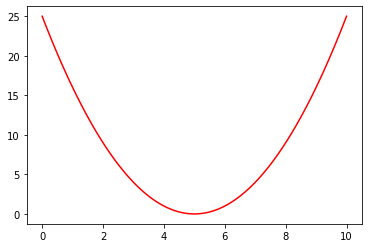

In [3]:
import matplotlib.pyplot as plt

W = np.linspace(0,10,100)
cost = W ** 2 - 10 * W + 25

plt.plot(W,cost, 'r')
plt.show()

Asi es que computemos la solución cómo sigue, cada vez que se corra la función será una iteración de entrenamiento para la red neuronal, por lo que la función $J$ se debería acercar poco a poco a 5:

In [4]:
def train_step():
    with tf.GradientTape() as tape:
        cost = w ** 2 - 10 * w + 25
    trainable_variables = [w]
    grads = tape.gradient(cost,trainable_variables)
    optimizer.apply_gradients(zip(grads, trainable_variables))

Al correrla una vez vemos que el valor de $w$ cambia

In [5]:
train_step()
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999997>


Al correrla mil veces vemos que prácticamente se ha alcanzado el valor de $w$ dónde la función $J$ es mínima.

In [6]:
for i in range(1000):
    train_step()

print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>


Esiste otra sintaxis que hace prácticamente lo mismo que la anterior:

In [7]:
w = tf.Variable(0,dtype=tf.float32) 
x = np.array([1.0,-10.0,25.0],dtype=np.float32)
optimizer = tf.keras.optimizers.Adam(0.1) 
    
def cost_fn():
    return x[0]*w**2 + x[1]*w + x[2]

print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


Corramos una vez con la nueva sintaxis:

In [8]:
optimizer.minimize(cost_fn,[w])
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999997>


Corramosla mil veces y veamos como va convergiendo el algoritmo:

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>


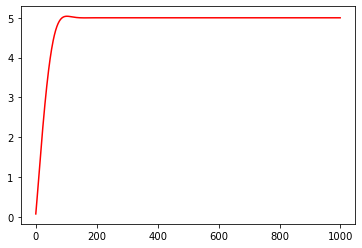

In [9]:
w = tf.Variable(0,dtype=tf.float32) 
w_list = []

iterations=1000

for i in range(iterations):
    optimizer.minimize(cost_fn,[w])
    w_list.append(w.numpy())
    
print(w)

plt.plot([i for i in range(iterations)],w_list, 'r')

En la gráfica es notorio que el algoritmo convergió desde la iteración número 200.

Así, vemos que, con TensorFLow, el problema se reduce a darle a la librería la función de coste $J$ y el algoritmo obtendrá los diferenciales y ejecutará la propagación backward por sí solo.